In [1]:

import importlib
import ifimage_tools
importlib.reload(ifimage_tools)
import pandas as pd
import warnings


In [2]:
import os
import numpy as np
from stardist.matching import matching
image_dir = "Reorgnized Ground Truth"
masks_dir = "Reorgnized Ground Truth/mask"
dataset = ifimage_tools.IfImageDataset(image_dir, masks_dir, {})
dataset.load_data()
old_version_sample_ids = ["6390", "8408", "8406", "8405v2", "8405", "8407"]
for sample_id in old_version_sample_ids:
    if sample_id in dataset.samples:
        del dataset.samples[sample_id]
METHODS = ["cyto3", "watershed", "cell_expansion"]
iou_thresholds = np.arange(0.5, 1.0, 0.05)
save_dir = "pre_iou"
os.makedirs(save_dir, exist_ok=True)

In [8]:
import joblib
with open("dataset_after_pipeline.joblib", "rb") as f:
    dataset = joblib.load(f)

# Get ps iou plot

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

#iou_thresholds = np.arange(0.05, 1.0, 0.05)
iou_thresholds = np.arange(0.5, 1.0, 0.05)
# plt.style.use('ggplot')

# Define the evaluation methods
METHODS = ["cellpose", "watershed", "cell_expansion"]
all_precisions = {method: {thr: [] for thr in iou_thresholds} for method in METHODS}

for sample_id, sample in dataset.samples.items():
    gt_mask = sample.cellbodies_multimask
    for method in METHODS:
        if method not in sample.cyto_positive_masks:
            print(f"Sample {sample_id} lacks prediction for method {method}; skipping...")
            continue
        pred_mask_source = sample.cyto_positive_masks[method]
        try:
            if isinstance(pred_mask_source, np.ndarray):
                pred_mask = pred_mask_source
            else:
                

                if not os.path.exists(pred_mask_source):
                    print(f"Prediction file does not exist: {pred_mask_source} (sample {sample_id}, method {method}); skipping...")
                    continue
                pred_mask = np.load(pred_mask_source)
        except Exception as e:
            print(f"Error loading prediction mask (sample {sample_id}, method {method}): {e}; skipping...")
            continue

        precisions = []
        for thr in iou_thresholds:
            try:
                match = matching(gt_mask, pred_mask, thresh=thr)
                precisions.append(match.precision)
            except Exception as e:
                print(f"Error computing matching (sample {sample_id}, method {method}, IoU {thr}): {e}")
                precisions.append(0)

        if all(p == 0 for p in precisions):
            print(f"All precision values are 0 for sample {sample_id} with method {method}; skipping...")
            continue

        for thr, prec in zip(iou_thresholds, precisions):
            all_precisions[method][thr].append(prec)

legend_mapping = {
    "cellpose": "CellPose",
    "watershed": "Watershed",
    "cell_expansion": "Cell Expansion"
}

# Plot mean precision vs. IoU threshold for each method and compute mAP
plt.figure(figsize=(6, 4))
for method in METHODS:
    valid_thresholds = [thr for thr in iou_thresholds if all_precisions[method][thr]]
    if not valid_thresholds:
        continue

    # Compute the mean precision at each valid threshold
    mean_precisions = {thr: np.mean(all_precisions[method][thr]) for thr in valid_thresholds}

    # Compute mAP as the average of the mean precisions
    mAP = np.mean(list(mean_precisions.values()))

    # Update the label to include mAP value (formatted to 2 decimal places)
    label_text = f"{legend_mapping.get(method, method)} (mAP={mAP:.2f})"

    plt.plot(
        valid_thresholds,
        [mean_precisions[thr] for thr in valid_thresholds],
        marker='o',
        linestyle='-',
        label=label_text
    )

plt.title("Mean Precision vs. IoU Threshold")
plt.xlabel("IoU Threshold")
plt.ylabel("Mean Precision")
plt.legend()
plt.tight_layout()
#plt.savefig("mean_precision_vs_iou_v1.pdf", format='pdf', dpi=300, bbox_inches='tight')
plt.show()

NameError: name 'dataset' is not defined

Error computing matching (sample 6390v2, method cellpose, IoU 0.05): y_true must be an array of non-negative integers.
Error computing matching (sample 6390v2, method cellpose, IoU 0.1): y_true must be an array of non-negative integers.
Error computing matching (sample 6390v2, method cellpose, IoU 0.15000000000000002): y_true must be an array of non-negative integers.
Error computing matching (sample 6390v2, method cellpose, IoU 0.2): y_true must be an array of non-negative integers.
Error computing matching (sample 6390v2, method cellpose, IoU 0.25): y_true must be an array of non-negative integers.
Error computing matching (sample 6390v2, method cellpose, IoU 0.3): y_true must be an array of non-negative integers.
Error computing matching (sample 6390v2, method cellpose, IoU 0.35000000000000003): y_true must be an array of non-negative integers.
Error computing matching (sample 6390v2, method cellpose, IoU 0.4): y_true must be an array of non-negative integers.
Error computing matchi

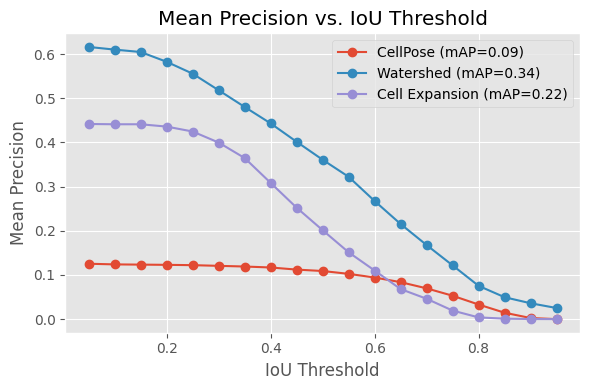

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt

iou_thresholds = np.arange(0.05, 1.0, 0.05)
# iou_thresholds = np.arange(0.5, 1.0, 0.05)
plt.style.use('ggplot')

# Define the evaluation methods
METHODS = ["cellpose", "watershed", "cell_expansion"]
all_precisions = {method: {thr: [] for thr in iou_thresholds} for method in METHODS}

# Iterate over each sample in the dataset
for sample_id, sample in dataset.samples.items():
    gt_mask = sample.cellbodies_multimask
    for method in METHODS:
        if method not in sample.cyto_positive_masks:
            print(f"Sample {sample_id} lacks prediction for method {method}; skipping...")
            continue
        pred_mask_source = sample.cyto_positive_masks[method]
        try:
            if isinstance(pred_mask_source, np.ndarray):
                pred_mask = pred_mask_source
            else:
                if not os.path.exists(pred_mask_source):
                    print(f"Prediction file does not exist: {pred_mask_source} (sample {sample_id}, method {method}); skipping...")
                    continue
                pred_mask = np.load(pred_mask_source)
        except Exception as e:
            print(f"Error loading prediction mask (sample {sample_id}, method {method}): {e}; skipping...")
            continue

        precisions = []
        for thr in iou_thresholds:
            try:
                match = matching(gt_mask, pred_mask, thresh=thr)
                precisions.append(match.precision)
            except Exception as e:
                print(f"Error computing matching (sample {sample_id}, method {method}, IoU {thr}): {e}")
                precisions.append(0)

        if all(p == 0 for p in precisions):
            print(f"All precision values are 0 for sample {sample_id} with method {method}; skipping...")
            continue

        for thr, prec in zip(iou_thresholds, precisions):
            all_precisions[method][thr].append(prec)

legend_mapping = {
    "cellpose": "CellPose",
    "watershed": "Watershed",
    "cell_expansion": "Cell Expansion"
}

# Plot mean precision vs. IoU threshold for each method and compute mAP
plt.figure(figsize=(6, 4))
for method in METHODS:
    valid_thresholds = [thr for thr in iou_thresholds if all_precisions[method][thr]]
    if not valid_thresholds:
        continue

    # Compute the mean precision at each valid threshold
    mean_precisions = {thr: np.mean(all_precisions[method][thr]) for thr in valid_thresholds}

    # Compute mAP as the average of the mean precisions
    mAP = np.mean(list(mean_precisions.values()))

    # Update the label to include mAP value (formatted to 2 decimal places)
    label_text = f"{legend_mapping.get(method, method)} (mAP={mAP:.2f})"

    plt.plot(
        valid_thresholds,
        [mean_precisions[thr] for thr in valid_thresholds],
        marker='o',
        linestyle='-',
        label=label_text
    )

plt.title("Mean Precision vs. IoU Threshold")
plt.xlabel("IoU Threshold")
plt.ylabel("Mean Precision")
plt.legend()
plt.tight_layout()
#plt.savefig("mean_precision_vs_iou_v2.pdf", format='pdf', dpi=300, bbox_inches='tight')
plt.show()